In [1]:
using DifferentialEquations, Optim, Plots, DataFrames, LinearAlgebra, ComponentArrays, CSV, BenchmarkTools, ForwardDiff

### ThyrosimIM Estimation

In [2]:
# Import sample data
sample_IM = DataFrame(CSV.File("C:/Users/Aidan/Documents/GitHub/BioCyb/thyrosimIM/data/sample_IM.csv"));

In [3]:
# Placeholder until some way to pass fixed, free parameters separatley is implemented
function fixed_parameters()
    p = zeros(Float64, 100)
    dial=[1.0; 0.88; 1.0; 0.88]
    p[1] = 0.0027785399344 #S4
    p[2] = 8               #tau
    p[3] = 0.868           #k12
    p[4] = 0.108           #k13
    p[5] = 584             #k31free
    p[6] = 1503            #k21free
    p[7] = 0.000289        #A
    p[8] = 0.000214        #B
    p[9] = 0.000128        #C
    p[10] = -8.83*10^-6    #D
    p[11] = 0.88           #k4absorb
    p[12] = 0.0189         #k02
    p[13] = 0.012101809339 #VmaxD1fast
    p[14] = 2.85           #KmD1fast
    p[15] = 6.63*10^-4     #VmaxD1slow
    p[16] = 95             #KmD1slow
    p[17] = 0.00074619     #VmaxD2slow
    p[18] = 0.075          #KmD2slow
    p[19] = 3.3572*10^-4   #S3
    p[20] = 5.37           #k45
    p[21] = 0.0689         #k46
    p[22] = 127            #k64free
    p[23] = 2043           #k54free
    p[24] = 0.00395        #a
    p[25] = 0.00185        #b
    p[26] = 0.00061        #c
    p[27] = -0.000505      #d
    p[28] = 0.88           #k3absorb
    p[29] = 0.184972339613 #k05
    p[30] = 450            #Bzero
    p[31] = 219.7085301388 #Azero
    p[32] = 0              #Amax
    p[33] = -3.71          #phi
    p[34] = 0.53           #kdegTSH-HYPO
    p[35] = 0.226          #VmaxTSH
    p[36] = 23             #K50TSH
    p[37] = 0.058786935033 #k3
    p[38] = 0.29           #T4P-EU
    p[39] = 0.006          #T3P-EU
    p[40] = 0.037          #KdegT3B
    p[41] = 0.0034         #KLAG-HYPO
    p[42] = 5              #KLAG
    p[43] = 1.3            #k4dissolve
    p[44] = 0.12           #k4excrete
    p[45] = 1.78           #k3dissolve
    p[46] = 0.12           #k3excrete
    p[47] = 3.2            #Vp
    p[48] = 5.2            #VTSH
    p[49] = 3.001011022378 #K_circ
    p[50] = 3.094711690204 #K_SR_tsh
    p[51] = 5.674773816316 #n_hillcirc
    p[52] = 6.290803221796 #m_hillTSH
    p[53] = 8.498343729591 #K_f4 for f4
    p[54] = 14.36664496926 #l_hillf3
    p[57] = dial[1] # controls T4 secretion rate
    p[58] = dial[2] # controls T4 excretion rate
    p[59] = dial[3] # controls T3 secretion rate
    p[60] = dial[4] # controls T3 excretion rate
    p[61] = 5.003761571969437   # σT4
    p[62] = 0.11122955089297369 # σT3
    p[63] = 0.4                 # σTSH
    p[64] = 0.1                 # σFT4
    p[65] = 21.82854404275587 # maleBMI_ref
    p[66] = 22.99050845201536 # femaleBMI_ref
    p[67] = 1.0 #Vtsh_scale
    p[69] = 1.0 # PV_ratio
    p[70] = -1.0 # PV
    p[71] = 1.0 # PV_allometric_exp
    p[72] = 1.0 # fat_free
    p[73] = 0.0 # fat
    p[74] = 1.0 # slow_scale
    p[75] = 1.0 # fast_scale
    p[76] = 0.75 # male_allometric
    p[77] = 0.75 # female_allometric
    p[78] = 1.7608716659237555 # male_ref_height
    p[79] = 1.6696106891941103 # female_ref_height
    p[80] = 1.0499391485135692 # male_clearace
    p[81] = 0.0 # T4 infusion
    p[82] = 0.0 # T3 infusion

    return p
end

function ics()
    ic    = zeros(Float64, 25)
    ic[1] = 0.322114215761171 #T4dot
    ic[2] = 0.201296960359917 #T4fast
    ic[3] = 0.638967411907560 #T4slow
    ic[4] = 0.00663104034826483 #T3pdot
    ic[5] = 0.0112595761822961 #T3fast
    ic[6] = 0.0652960640300348 #T3slow
    ic[7] = 1.78829584764370 #TSHp
    ic[8] = 7.05727560072869 #T3B
    ic[9] = 7.05714474742141 #T3B_lag
    ic[10] = 0 #T4PILLdot
    ic[11] = 0 #T4GUTdot
    ic[12] = 0 #T3PILLdot
    ic[13] = 0 #T3GUTdot
    ic[14] = 3.34289716182018 #delay1
    ic[15] = 3.69277248068433 #delay2
    ic[16] = 3.87942133769244 #delay3
    ic[17] = 3.90061903207543 #delay4
    ic[18] = 3.77875734283571 #delay5
    ic[19] = 3.55364471589659 #delay6
    ic[20] = 100 # B-cells
    ic[21] = 20 # Plasma cells 
    ic[22] = 100 # CD4+ cells
    ic[23] = 5e9 # Cytokines
    ic[24] = 5 # FTS
    ic[25] = 2e9 # Antibodies

    return ic
end

ics (generic function with 1 method)

In [4]:
# Placeholder until some way to pass fixed, free parameters separatley is implemented
function initialize_free()
    p = zeros(17)
    p[1] = 3e-3 # B-cell activation rate, will probably be lower due to T3 term p[15]
    p[2] = 1e-2 # Plasma cell transformation rate
    p[3] = 8.05e-1 # CD4+ activation rate
    p[4] = 51.84e5 # Cytokine production rate
    p[5] = 1e6 # relative growth rate of FTS
    p[6] = 1e6 # combined antibody production rate
    p[7] = 2e-6 # B-cell death rate
    p[8] = 4.0e-2 # Plasma cell death rate
    p[9] = 8.91e-3 # CD4+ cell death rate
    p[10] = .189  # Cytokine degredation rate
    p[11] = 1e-2 # Functional thyroid destruction rate
    p[12] = 1.74e-3 # Blood Ab degredation rate
    p[13] = 18e5 # B-cell cytokine binding activation threshold
    p[14] = 2e6 # CD4+ T-cell cytokine binding activation threshold
    p[15] = 1e3 # NOTE: NEED TO FIT and CHANGE
    p[16] = 9.1e-4 # CD4+ T-cell stimulation rate
    p[17] = 13.5 # Euthyroid FTS
    return p
end

# Preturbed free variables to see if fitting works
function initialize_free_varied()
    p = zeros(17)
    p[1] = 3.9e-3 # B-cell activation rate, will probably be lower due to T3 term p[15]
    p[2] = 1.2e-2 # Plasma cell transformation rate
    p[3] = 3.05e-1 # CD4+ activation rate
    p[4] = 56.84e5 # Cytokine production rate
    p[5] = 1.1e6 # relative growth rate of FTS
    p[6] = 1e6 # combined antibody production rate
    p[7] = 2.2e-6 # B-cell death rate
    p[8] = 3.0e-2 # Plasma cell death rate
    p[9] = 1.91e-4 # CD4+ cell death rate
    p[10] = .389  # Cytokine degredation rate
    p[11] = 1.4e-2 # Functional thyroid destruction rate
    p[12] = 1.34e-3 # Blood Ab degredation rate
    p[13] = 78e4 # B-cell cytokine binding activation threshold
    p[14] = 23e5 # CD4+ T-cell cytokine binding activation threshold
    p[15] = 3.2e3 # NOTE: NEED TO FIT and CHANGE
    p[16] = 9.1e-4 # CD4+ T-cell stimulation rate
    p[17] = 12.5 # Euthyroid FTS
    return p
end

initialize_free_varied (generic function with 1 method)

In [5]:
function thyrosimIM_estimate(dq, q, p, t)
    kdelay = 5/8
    fixed_p = fixed_parameters()
    dial=[1.0; 0.88; 1.0; 0.88] # can probably remove this?

    # scaling the mass/concentration of compartments
    fixed_plasma_volume_ratio = fixed_p[69]^fixed_p[71]
    slow_volume_ratio = fixed_p[74]^fixed_p[71]
    fast_volume_ratio = fixed_p[75]^fixed_p[71]

    # scale comparment sizes
    q1 = q[1] * 1 / fixed_p[69]
    q2 = q[2] * 1 / fixed_p[75]
    q3 = q[3] * 1 / fixed_p[74]
    q4 = q[4] * 1 / fixed_p[69]
    q5 = q[5] * 1 / fixed_p[75]
    q6 = q[6] * 1 / fixed_p[74]
    q7 = q[7] * 1 / fixed_p[69]

    # Auxillary equations
    q4F = (fixed_p[24]+ fixed_p[25] * q1 + fixed_p[26] * q1^2 + fixed_p[27] * q1^3) * q4 #FT3p
    q1F = (fixed_p[7] + fixed_p[8] * q1 + fixed_p[9] * q1^2 + fixed_p[10] * q1^3) * q1  #FT4p
    SR3 = (q[24]/p[17])*(fixed_p[19] * fixed_p[59] * q[19]) # Scaled (q[24]/fixed_p[100]) Brain delay (dial 3)
    SR4 = (q[24]/p[17])*(fixed_p[1] * fixed_p[57] * q[19])  # Scaled (q[24]/fixed_p[100]) Brain delay (dial 1)
    fCIRC = q[9]^fixed_p[51] / (q[9]^fixed_p[51] + fixed_p[49]^fixed_p[51])
    SRTSH = (fixed_p[30]+fixed_p[31]*fCIRC*sin(pi/12*t-fixed_p[33]))*(fixed_p[50]^fixed_p[52]/(fixed_p[50]^fixed_p[52] + q[9]^fixed_p[52]))
    fdegTSH = fixed_p[34] + fixed_p[35] / (fixed_p[36] + q7)
    fLAG = fixed_p[41] + 2*q[8]^11 / (fixed_p[42]^11 + q[8]^11)
    f4 = fixed_p[37]*(1 + 5*(fixed_p[53]^fixed_p[54]) / (fixed_p[53]^fixed_p[54]+q[8]^fixed_p[54]))
    NL = fixed_p[13] / (fixed_p[14] + q2)

    # ODEs
    dq[1]  = fixed_p[81] + (SR4 + fixed_p[3] * q2 + fixed_p[4] * q3 - (fixed_p[5] + fixed_p[6]) * q1F) * fixed_plasma_volume_ratio + fixed_p[11] * q[11] #T4dot (need to remove u1)
    dq[2]  = (fixed_p[6] * q1F - (fixed_p[3] + fixed_p[12] + NL) * q2) * fast_volume_ratio                                    #T4fast
    dq[3]  = (fixed_p[5] * q1F -(fixed_p[4] + fixed_p[15] / (fixed_p[16] + q3) + fixed_p[17] /(fixed_p[18] + q3)) * q3) * slow_volume_ratio  #T4slow
    dq[4]  = fixed_p[82] + (SR3 + fixed_p[20] * q5 + fixed_p[21] * q6 - (fixed_p[22] + fixed_p[23]) * q4F) * fixed_plasma_volume_ratio + fixed_p[28] * q[13] #T3pdot
    dq[5]  = (fixed_p[23] * q4F + NL * q2 - (fixed_p[20] + fixed_p[29]) * q5) * fast_volume_ratio                         #T3fast
    dq[6]  = (fixed_p[22] * q4F + fixed_p[15] * q3 / (fixed_p[16] + q3) + fixed_p[17] * q3 / (fixed_p[18] + q3) -(fixed_p[21])*q6) * slow_volume_ratio #T3slow
    dq[7]  = (SRTSH - fdegTSH * q7) * fixed_plasma_volume_ratio                                           #TSHfixed_p
    dq[8]  = f4 / fixed_p[38] * q1 + fixed_p[37] / fixed_p[39] * q4 - fixed_p[40] * q[8]          #T3B
    dq[9]  = fLAG * (q[8] - q[9])                                             #T3B LAG
    dq[10] = -fixed_p[43] * q[10]                                                   #T4PILLdot
    dq[11] =  fixed_p[43] * q[10] - (fixed_p[44] * fixed_p[58]+ fixed_p[11]) * q[11]                  #T4GUTdot: note fixed_p[44] * fixed_p[58] = fixed_p[44] * dial[2] = k4excrete
    dq[12] = -fixed_p[45] * q[12]                                                   #T3PILLdot
    dq[13] =  fixed_p[45] * q[12] - (fixed_p[46] * fixed_p[60] + fixed_p[28]) * q[13]                 #T3GUTdot: note fixed_p[46] * fixed_p[60] = fixed_p[46] * dial[4] = k3excrete

    # Delay ODEs
    dq[14] = kdelay * (q7 - q[14]) 
    dq[15] = kdelay * (q[14] - q[15])                                         #delay2: TSH delay
    dq[16] = kdelay * (q[15] - q[16])                                         #delay3
    dq[17] = kdelay * (q[16] - q[17])                                         #delay4
    dq[18] = kdelay * (q[17] - q[18])                                         #delay5
    dq[19] = kdelay * (q[18] - q[19])
    
    # Immune ODEs
    dq[20] = p[1]*(q[23]/(q[23]+p[13]))*q[22]+p[15]*q4F-(p[7]+p[2])*q[20] # Bdot
    dq[21] = p[2]*q[20]-p[8]*q[21] # Pdot
    dq[22] = p[3]*q[24]+p[16]*(q[23]/(q[23]+p[14]))*q[22]-p[9]*q[22] # Tdot
    dq[23] = p[4]*q[22]-p[8]*q[23] # Cdot
    dq[24] = p[5]*((q7/q[24])*p[17])-p[11]*(q[24])*q[25] #p[9]*((q7/q[24])*p[17])-p[10]*(q[24]/p[17])*q[25] # FTSdot MODIFIED
    dq[25] = p[6]*q[21]-q[25]*(p[12]+p[11]*q[24]) # Abdot

    return dq
end

thyrosimIM_estimate (generic function with 1 method)

In [6]:
"""
Run parameter estimation on immune parameters. 
"""
function fit_params(data::DataFrame, p0::Vector, lb::Vector, ub::Vector)

    t = data.t
    ic = ics()    
    sol_index = [1,4,7,20,21,22,23,24,25]
    cols = names(sample_IM)[2:10]

    function error(p,t,data)
        tspan = (t[1],t[end])
        prob = ODEProblem(thyrosimIM_estimate, ic, tspan, p)
        sol = solve(prob, Rosenbrock23())

        loss = 0
        for i in 1:size(cols)[1] # can probably speed this up with eachcol notation
            dp = 1
            for time in t
                loss += ((sol(time)[sol_index[i]]-data[!,cols[i]][dp])/mean(data[!,cols[i]]))^2
                dp += 1
            end
        end
        return loss
    end

    function set_lower_bounds(p::Vector, lb::Vector)
        for i in eachindex(p)
            if p[i] < lb[i]
                p[i] = lb[i]
            end
        end
        return p
    end

    function set_upper_bounds(p::Vector, lb::Vector)
        for i in eachindex(p)
            if p[i] >= ub[i]
                p[i] = ub[i]
            end
        end
        return p
    end

    function objective(p_free, lb, ub)
        p_free = set_lower_bounds(p_free, lb)
        p_free = set_upper_bounds(p_free, ub)
        return error(p_free, t, data)
    end

    # Adjust so fitting indicies and parameters can be specified
    result = optimize(p -> objective(p, lb, ub), p0, NelderMead(),
     Optim.Options(time_limit = 300.0, iterations = 10000, g_tol=1e-5,
     show_trace = false, allow_f_increases=true))
end

fit_params

In [7]:
p0 = initialize_free_varied()
lb = zeros(size(p0)[1])
ub = fill(Inf, size(p0)[1]);

In [8]:
"""
Calculate error prior to parameter fitting. 
"""
function prefit_error(data::DataFrame, p0::Vector)

    t = data.t
    ic = ics()    
    sol_index = [1,4,7,20,21,22,23,24,25]
    cols = names(sample_IM)[2:10]

    function error(p,t,data)
        tspan = (t[1],t[end])
        prob = ODEProblem(thyrosimIM_estimate, ic, tspan, p)
        sol = solve(prob, Rosenbrock23())

        loss = 0
        for i in 1:size(cols)[1] # can probably speed this up with eachcol notation
            dp = 1
            for time in t
                loss += ((sol(time)[sol_index[i]]-data[!,cols[i]][dp])/mean(data[!,cols[i]]))^2
                dp += 1
            end
            print("Column: ", cols[i], "\n")
            print("Current Error: ", loss, "\n\n")
        end
        return loss
    end

    function objective(p_free)
        return error(p_free, t, data)
    end

    objective(p0)

end

# prefit_error(sample_IM, p0)

prefit_error

In [9]:
optimal_params = fit_params(sample_IM, p0, lb, ub)

┌ Warning: Instability detected. Aborting
└ @ SciMLBase C:\Users\Aidan\.julia\packages\SciMLBase\VdcHg\src\integrator_interface.jl:596


┌ Warning: Instability detected. Aborting
└ @ SciMLBase C:\Users\Aidan\.julia\packages\SciMLBase\VdcHg\src\integrator_interface.jl:596


 * Status: success

 * Candidate solution
    Final objective value:     3.850095e+00

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-05

 * Work counters
    Seconds run:   126  (vs limit 300)
    Iterations:    2304
    f(x) calls:    3165


In [10]:
Nedler_parameter = optimal_params.minimizer

17-element Vector{Float64}:
      0.0030132925236327586
      0.01014495867777137
      0.9111972423269578
      1.1297922340712538e6
 928146.3022778957
      1.0597044236022176e6
      3.9116719416399226e-7
      0.04110886957945271
      0.01097484899011927
      0.8752103031458476
      0.010255191194519665
      0.0020075573971832347
 638279.8650968933
 734202.0121168094
   1277.4986369604183
      0.001799524472072096
     14.675801285321908

In [11]:
# function plot_estIM(data)

#     tvals = data.t./24

#     p1 = scatter(tvals, data.T4, ylabel="T4 (mcg/L)")    
#     p2 = scatter(tvals, data.T3, ylabel="T3 (mcg/L)")    
#     p3 = scatter(tvals, data.TSH, ylabel="TSH (mU/L)")
#     p4 = scatter(tvals, data.Bcells, ylabel="Bcell (cell/mL)")
#     p5 = scatter(tvals, data.Plasma, ylabel="Plasma Cell (cell/mL)")
#     p6 = scatter(tvals, data.CD4, ylabel="CD4+ Cell (cell/mL)")
#     p7 = scatter(tvals, data.Cytokine, ylabel="Cytokines (nM)")
#     p8 = scatter(tvals, data.FTS, ylabel="Functional Thyroid Size (mL)")
#     p9 = scatter(tvals, data.Ab, ylabel="TPOAb (pM)")

#     plot!(size=(900,900))
#     plot(p1, p2, p3, p4, p5, p6, p7, p8, p9, layout=(3, 3))

# end

In [12]:
# plot_estIM(sample_IM)

In [13]:
# Compute unfit and fitted solutions for visualization
p0 = initialize_free_varied()
tspan=(0.0,720.0)
ic = ics() 
initial_prob = ODEProblem(thyrosimIM_estimate, ic, tspan, p0)
prob = ODEProblem(thyrosimIM_estimate, ic, tspan, optimal_params.minimizer)
initial_sol = solve(initial_prob, Rosenbrock23())
sol = solve(prob, Rosenbrock23());

In [14]:
" Outputs a scatterplot of the data overlayed with model predictions pre and post-fitting"
function output_plotIM(sol_init, sol_fit, data; title::AbstractString = "ThyrosimIM Parameter Fitting", automargins::Bool=true)

    # can definitley clean up this code quite a bit later (looped plotting, get rid of unnecessary plots...)
    # parameters to adjust figure limits
    time = sol_init.t
    time_fit = sol_fit.t
    tvals = data.t./24

    t4lim, t3lim, tshlim = 140, 4, 10
    T4 = 777.0 * sol_init[1, :] / 3.2; T4_fit = 777.0 * sol_fit[1, :] / 3.2 
    T3 = 651.0 * sol_init[4, :] / 3.2; T3_fit = 651.0 * sol_fit[4, :] / 3.2
    TSH = 5.6 * sol_init[7, :] / 5.2; TSH_fit = 5.6 * sol_fit[7, :] / 5.2
    Bcell = sol_init[20, :]; Bcell_fit = sol_fit[20, :]
    PlasmaCell = sol_init[21, :]; PlasmaCell_fit = sol_fit[21, :]
    CD4Cell = sol_init[22, :]; CD4Cell_fit = sol_fit[22, :]
    Cytokines = sol_init[23, :]/6.022e11; Cytokines_fit = sol_fit[23, :]/6.022e11 # convert to nM from molecules/mL
    FTS = sol_init[24, :]; FTS_fit = sol_fit[24, :]
    TPOAb = sol_init[25, :]/6.022e8; TPOAb_fit = sol_fit[25, :]/6.022e8 # convert to pM from molecules/mL

    xlim=(0,time[end]/24) 
    if automargins
        t4lim = max(1.2maximum(T4), 130.0)
        t3lim = max(1.2maximum(T3), 2.5)
        tshlim = max(1.2maximum(TSH), 5.5)
        Blim = 1.2maximum(Bcell)
        Plim = 1.2maximum(PlasmaCell)
        Tlim = 1.2maximum(CD4Cell)
        Clim = 1.2maximum(Cytokines)
        Flim = 1.2maximum(FTS)
        Alim = 1.2maximum(TPOAb)
    end

    p1 = plot(time / 24.0, T4, ylim=(0, t4lim), xlim=xlim, linewidth=2, label="T4 Initial", ylabel="T4 (mcg/L)")
    p1 = scatter!(tvals, (777.0/3.2).*data.T4, ylabel="T4 (mcg/L)", markersize=1, label="")    
    p1 = plot!(time_fit / 24.0, T4_fit, ylim=(0, t4lim), xlim=xlim, linewidth=2, label="T4 Fit", ylabel="T4 (mcg/L)", color=:darkorchid)
    p2 = plot(time / 24.0, T3, ylim=(0, t3lim), xlim=xlim, linewidth=2, label="T3 Initial", ylabel="T3 (mcg/L)", title=title)
    p2 = scatter!(tvals, (651.0/3.2).*data.T3, ylabel="T3 (mcg/L)", markersize=1, label="")    
    p2 = plot!(time_fit / 24.0, T3_fit, ylim=(0, t3lim), xlim=xlim, linewidth=2, label="T3 Fit", ylabel="T3 (mcg/L)", title=title, color=:darkorchid)
    p3 = plot(time / 24.0, TSH, ylim=(0, tshlim), xlim=xlim, linewidth=2, label="TSH Initial", ylabel="TSH (mU/L)")
    p3 = scatter!(tvals, (5.6/5.2).*data.TSH, ylabel="TSH (mU/L)", markersize=1, label="")
    p3 = plot!(time_fit / 24.0, TSH_fit, ylim=(0, tshlim), xlim=xlim, linewidth=2, label="TSH Fit", ylabel="TSH (mU/L)", color=:darkorchid)
    p4 = plot(time / 24.0, Bcell, label="Bcell Initial", ylabel="Bcell (cell/mL)", ylim=(0,Blim), xlim=xlim, linewidth=2)
    p4 = scatter!(tvals, data.Bcells, ylabel="Bcell (cell/mL)", markersize=1, label="")
    p4 = plot!(time_fit / 24.0, Bcell_fit, label="Bcell Fit", ylabel="Bcell (cell/mL)", ylim=(0,Blim), xlim=xlim, linewidth=2, color=:darkorchid)
    p5 = plot(time / 24.0, PlasmaCell, label="PlasmaCell Initial", ylabel="Plasma Cell (cell/mL)", ylim=(0,Plim), xlim=xlim, linewidth=2)
    p5 = scatter!(tvals, data.Plasma, ylabel="Plasma Cell (cell/mL)", markersize=1, label="")
    p5 = plot!(time_fit / 24.0, PlasmaCell_fit, label="PlasmaCell Fit", ylabel="Plasma Cell (cell/mL)", ylim=(0,Plim), xlim=xlim, linewidth=2, color=:darkorchid)
    p6 = plot(time / 24.0, CD4Cell, label="CD4 Initial", ylabel="CD4+ Cell (cell/mL)", ylim=(0,Tlim), xlim=xlim, linewidth=2)
    p6 = scatter!(tvals, data.CD4, ylabel="CD4+ Cell (cell/mL)", markersize=1, label="")
    p6 = plot!(time_fit / 24.0, CD4Cell_fit, label="CD4 Fit", ylabel="CD4+ Cell (cell/mL)", ylim=(0,Tlim), xlim=xlim, linewidth=2, color=:darkorchid)
    p7 = plot(time / 24.0, Cytokines, label="Cytokine Initial", ylabel="Cytokines (nM)", xlabel="time [days]", ylim=(0,Clim), xlim=xlim, linewidth=2)
    p7 = scatter!(tvals, data.Cytokine./6.022e11, ylabel="Cytokines (nM)", markersize=1, label="")
    p7 = plot!(time_fit / 24.0, Cytokines_fit, label="Cytokine Fit", ylabel="Cytokines (nM)", xlabel="time [days]", ylim=(0,Clim), xlim=xlim, linewidth=2, color=:darkorchid)
    p8 = plot(time / 24.0, FTS, label="FTS Initial", ylabel="Functional Thyroid Size (mL)", xlabel="time [days]", ylim=(0,Flim), xlim=xlim, linewidth=2)
    p8 = scatter!(tvals, data.FTS, ylabel="Functional Thyroid Size (mL)", markersize=1, label="")
    p8 = plot!(time_fit / 24.0, FTS_fit, label="FTS Fit", ylabel="Functional Thyroid Size (mL)", xlabel="time [days]", ylim=(0,Flim), xlim=xlim, linewidth=2, color=:darkorchid)
    p9 = plot(time / 24.0, TPOAb, label="TPOAb Initial", ylabel="TPOAb (pM)", xlabel="time [days]", ylim=(0,Alim), xlim=xlim, linewidth=2)
    p9 = scatter!(tvals, data.Ab./6.022e8, ylabel="TPOAb (pM)", markersize=1, label="")
    p9 = plot!(time_fit / 24.0, TPOAb_fit, label="TPOAb Fit", ylabel="TPOAb (pM)", xlabel="time [days]", ylim=(0,Alim), xlim=xlim, linewidth=2, color=:darkorchid)

    plot!(size=(900,900))
    plot(p1, p2, p3, p4, p5, p6, p7, p8, p9, layout=(3, 3))
    #savefig("fitting_results.png")
end

output_plotIM

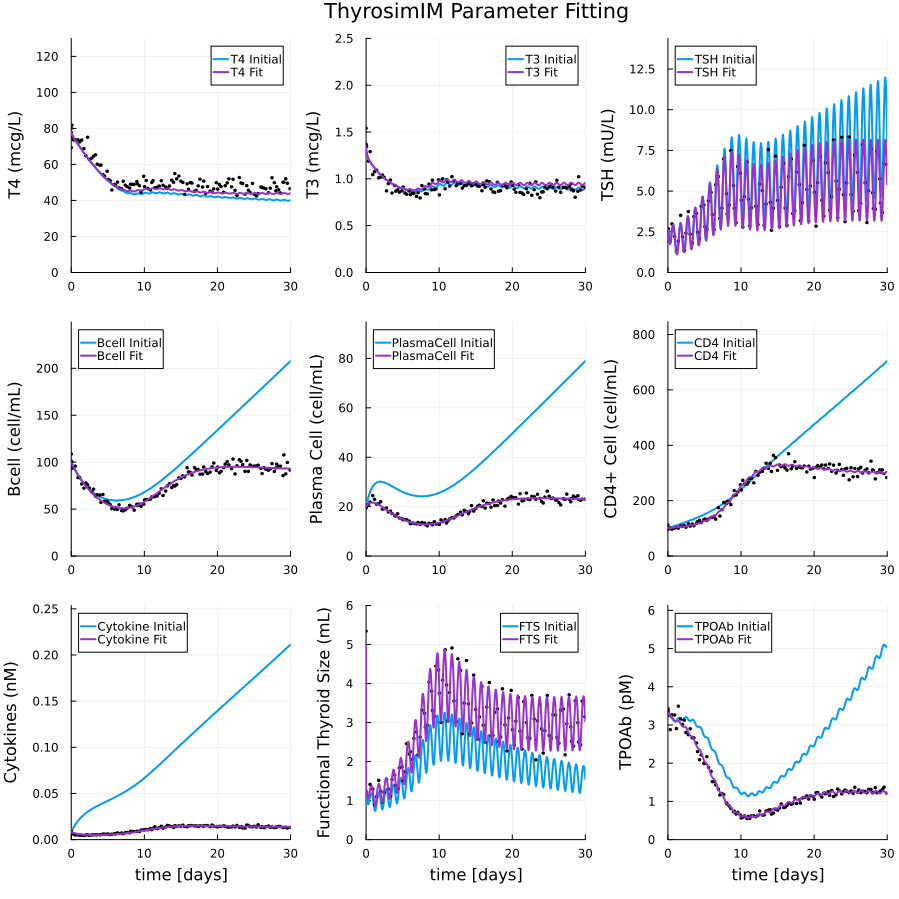

In [15]:
output_plotIM(initial_sol, sol, sample_IM)

In [16]:
"""
Run parameter estimation on immune parameters. 
"""
function CV_estim(data::DataFrame, p0::Vector, lb::Vector, ub::Vector)

    t = data.t
    ic = ics()    
    sol_index = [1,4,7,20,21,22,23,24,25]
    cols = names(sample_IM)[2:10]

    function error(p,t,data)
        tspan = (t[1],t[end])
        prob = ODEProblem(thyrosimIM_estimate, ic, tspan, p)
        sol = solve(prob, Rosenbrock23())

        loss = 0
        for i in 1:size(cols)[1]
            dp = 1
            for time in t
                loss += ((sol(time)[sol_index[i]]-data[!,cols[i]][dp])/mean(data[!,cols[i]]))^2
                dp += 1
            end
        end
        return loss
    end

    function set_lower_bounds(p::Vector, lb::Vector)
        for i in eachindex(p)
            if p[i] < lb[i]
                p[i] = lb[i]
            end
        end
        return p
    end

    function set_upper_bounds(p::Vector, lb::Vector)
        for i in eachindex(p)
            if p[i] >= ub[i]
                p[i] = ub[i]
            end
        end
        return p
    end

    function objective(p_free, lb, ub)
        p_free = set_lower_bounds(p_free, lb)
        p_free = set_upper_bounds(p_free, ub)
        return error(p_free, t, data)
    end

    # Adjust so fitting indicies and parameters can be specified
    result = optimize(p -> objective(p, lb, ub), p0, Newton(),
     Optim.Options(time_limit = 100.0, iterations = 10, g_tol=1e-5, store_trace=true,
     show_trace = true, allow_f_increases=true, extended_trace=true))
end

CV_estim

In [17]:
# Compute one iteration of Newton's method to get an approximation of the 
# hessian at the parameter solution found by Nedler-Mead (takes a while to run)
Estimated_CV = CV_estim(sample_IM, Nedler_parameter, lb, ub)

Iter     Function value   Gradient norm 
     0     3.850095e+00     2.771059e+01
 * Current step size: 1.0
 * time: 0.018000125885009766


 * g(x): [-10.628190625620832, -2.0418771118740953, 0.03728691002857859, -1.164985304974526e-9, 2.588715007864492e-8, -4.9008103667359366e-8, 27.710590678933002, 1.6469000031955698, -1.6055081401985976, 0.0, 3.228042687382519, 3.4133472467632906, -5.148623746258167e-11, 1.7545058750653585e-11, 3.2209902695003143e-6, 1.6128132379076057, 0.0008087791941119775]


 * h(x): [3.9914065724039495e7 -3.291100736424014e6 69132.16679991782 -0.023264492852870678 -0.005622032852832792 0.037273630721665015 -5.744877641465902e6 -1.3940916461836845e6 -5.735824265194267e6 0.0 -3.0195010277870446e6 -1.147895834710732e6 -1.6139578241483398e-5 -1.6301555127992781e-6 2.905197440858579 5.73515857115759e6 250.95762166960046; -3.291100736424014e6 2.295451335886568e6 -14271.010907500982 -0.0012449764161882046 -0.012418918370785098 0.012844089298023687 401611.9752030745 -324933.9423367232 1.282359824964255e6 0.0 -283881.6927218959 -709974.7101835907 1.08450756034117e-6 3.10115532926303e-7 -0.17951641501200316 -1.2822331598503888e6 -1163.0255390623074; 69132.16679991782 -14271.010907500982 657.8084551393986 0.0001714948550881477 0.00023483059518399592 -9.964844308535866e-5 -8922.07371199131 -5573.593754038215 -58091.54694379121 0.0 -9643.248586006463 4671.332415431738 1.1127099188789989e-7 -1.4221680413449052e-8 0.003610801781779837 58085.666563376784 28.2556679018774

     1     3.850099e+00     5.151427e+01
 * Current step size: 0.44116951613357125
 * time: 103.75200009346008
 * g(x): [-51.51426911943512, 2.0298456692335884, -0.050499133230216486, 1.9218821691996683e-8, 3.49652182031221e-8, -8.997903599517549e-8, 32.18279289026666, 2.906016200484887, 5.267298905355926, 0.0, 6.111136884928234, 4.464784085305291, -4.6563089481763147e-10, -3.547736347136385e-10, 3.8096124672037125e-7, -5.259285092956397, 0.001436649556880868]
 * h(x): [3.993282029057276e7 -3.2894554888194203e6 69108.78565400839 -0.023277623596159123 -0.005659453964714113 0.03728689482502595 -5.7255003296714425e6 -1.393888718401e6 -5.732161097331569e6 0.0 -3.0176050148571283e6 -1.1480742969229072e6 -1.6125418189915204e-5 -1.6271607975812446e-6 2.906193277550821 5.731495837144703e6 246.92129548221132; -3.2894554888194203e6 2.2935805083479285e6 -14268.003668680787 -0.0012447377330219085 -0.012412247007010544 0.012837468506621447 399386.8288570419 -324759.1526723653 1.2818976548009217e6 0

 * Status: failure (objective increased between iterations) (exceeded time limit of 100.0)

 * Candidate solution
    Final objective value:     3.850099e+00

 * Found with
    Algorithm:     Newton's Method

 * Convergence measures
    |x - x'|               = 2.13e-03 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.88e-09 ≰ 0.0e+00
    |f(x) - f(x')|         = 3.85e-06 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.00e-06 ≰ 0.0e+00
    |g(x)|                 = 5.15e+01 ≰ 1.0e-05

 * Work counters
    Seconds run:   104  (vs limit 100)
    Iterations:    1
    f(x) calls:    57
    ∇f(x) calls:   57
    ∇²f(x) calls:  2


In [18]:
Hessian = Estimated_CV.trace[end].metadata["h(x)"]

17×17 Matrix{Float64}:
     3.99328e7       -3.28946e6   …        5.7315e6      246.921
    -3.28946e6        2.29358e6           -1.28177e6   -1162.19
 69108.8         -14268.0              58114.5            28.2474
    -0.0232776       -0.00124474           0.0156099       1.036e-5
    -0.00565945      -0.0124122            0.0204728       2.45521e-5
     0.0372869        0.0128375   …       -0.00903395     -2.23614e-5
    -5.7255e6         3.99387e5           -7.74954e5     124.627
    -1.39389e6       -3.24759e5           -5.026e5        71.4505
    -5.73216e6        1.2819e6            -5.28899e6   -2508.01
     0.0              0.0                  0.0             0.0
    -3.01761e6       -2.83987e5   …  -886579.0           272.026
    -1.14807e6       -7.09615e5       351431.0          1072.47
    -1.61254e-5       1.09365e-6          -1.65017e-6     -4.25781e-9
    -1.62716e-6       3.09601e-7          -1.17678e-6     -5.69532e-10
     2.90619         -0.179307             0.3

In [19]:
hess_df = DataFrame(Hessian, :auto)

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,3.99328e7,-3.28946e6,69108.8,-0.0232776,-0.00565945,0.0372869,-5.7255e6,-1.39389e6,-5.73216e6,0.0,-3.01761e6,-1.14807e6,-1.61254e-5,-1.62716e-6,2.90619,5.7315e6,246.921
2,-3.28946e6,2.29358e6,-14268.0,-0.00124474,-0.0124122,0.0128375,3.99387e5,-3.24759e5,1.2819e6,0.0,-2.83987e5,-7.09615e5,1.09365e-6,3.09601e-7,-0.179307,-1.28177e6,-1162.19
3,69108.8,-14268.0,659.206,0.000171688,0.000234832,-9.9808e-5,-8886.49,-5574.53,-58120.4,0.0,-9639.32,4674.11,-1.40614e-8,-8.49688e-9,0.00376943,58114.5,28.2474
4,-0.0232776,-0.00124474,0.000171688,2.01439e-10,9.48707e-11,-8.02734e-11,0.0035261,-0.00341951,-0.0156114,0.0,-0.000423743,0.00284273,5.28773e-14,-3.65088e-15,-2.0414e-9,0.0156099,1.036e-5
5,-0.00565945,-0.0124122,0.000234832,9.48707e-11,2.85781e-10,-2.60129e-10,0.00270183,0.00192327,-0.0204747,0.0,0.00350758,0.0134614,5.82055e-14,-4.81002e-15,-2.04113e-9,0.0204728,2.45521e-5
6,0.0372869,0.0128375,-9.9808e-5,-8.02734e-11,-2.60129e-10,3.43776e-10,-0.0072268,-0.00468386,0.00903452,0.0,-0.0138584,-0.0171199,-3.78715e-14,1.69277e-15,4.29576e-9,-0.00903395,-2.23614e-5
7,-5.7255e6,3.99387e5,-8886.49,0.0035261,0.00270183,-0.0072268,2.235e6,2.4926e5,7.75045e5,0.0,5.40331e5,3.21301e5,2.59135e-6,2.97271e-7,-0.464372,-7.74954e5,124.627
8,-1.39389e6,-3.24759e5,-5574.53,-0.00341951,0.00192327,-0.00468386,2.4926e5,3.01465e5,5.02654e5,0.0,3.62796e5,2.73779e5,7.19859e-7,1.326e-7,-0.134321,-5.026e5,71.4505
9,-5.73216e6,1.2819e6,-58120.4,-0.0156114,-0.0204747,0.00903452,7.75045e5,5.02654e5,5.28481e6,0.0,8.86675e5,-3.51469e5,1.68682e-6,1.23621e-6,-0.309447,-5.28899e6,-2508.01


In [20]:
inv(Hessian)

SingularException: SingularException(10)

In [21]:
Estimated_CV.minimizer[10]

0.8752103031458476

In [22]:
eigenvalues, eigenvectors = eigen(Hessian)
eigenvalues

17-element Vector{Float64}:
  -4683.133218853559
     -1.9300372163285772e-10
     -2.516386616955858e-11
     -6.236995742759808e-12
      1.2012626460914939e-11
      1.2813429381121214e-11
      5.322303234119648e-11
      1.7547491011609213e-7
      0.7672159388292253
     17.192489574443243
  86656.47376245308
 238356.7129022168
 873082.8790759981
      1.3739437716167702e6
      2.8861722336693765e6
      8.75522155940098e6
      4.351143589140741e7